# Accident severity Prediction Model

Import different libraries for data manipulation, analysis and visualisation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve


#Load road traffic accidents in the UK data from a cvs file into a DataFrame

In [ ]:
df= pd.read_csv('dft-road-statistics-collision-last-5-years.csv')
# create reference to the loaded DataFrame
final_df= df
# to display shape of the DataFrame( number of rows, columns)
final_df.shape

<ipython-input-2-d2ada25336dd>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('dft-road-statistics-collision-last-5-years.csv')


(538461, 36)

**Data Preproceesing**

In [ ]:
# displays first 5 records from the dataset
final_df.sample(5)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
419394,2.0215E+12,2021,501132316,167890.0,39740.0,-5.254673,50.212028,50,3,2,...,0,6,1,2,0,0,2,1,2,E01018894
235477,2.01993E+12,2019,930875937,345808.0,750757.0,-2.885297,56.645463,93,2,2,...,0,1,1,1,0,0,1,1,-1,-1
120294,201897GK03001,2018,97GK03001,261804.0,665518.0,-4.209712,55.862966,97,3,2,...,0,1,1,1,0,0,1,2,-1,-1
346120,2021010000000.0,2021,10329689,526299.0,177290.0,-0.182593,51.480475,1,3,2,...,0,4,2,9,0,0,1,3,2,E01002843
284866,2.02021E+12,2020,211025066,387967.0,292534.0,-2.178803,52.530554,21,3,2,...,0,1,2,2,0,0,1,2,2,E01029676


In [ ]:
# Displays Descriptive Statistics of all the numeric columns from the DataFrame
final_df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,538461.000000,538325.000000,5.383250e+05,538325.000000,538325.000000,538461.000000,538461.000000,538461.000000,538461.000000,538461.000000,...,538461.000000,538461.000000,538461.000000,538461.000000,538461.000000,538461.000000,538461.000000,538461.000000,538461.000000,538461.000000
mean,2019.907679,454165.430285,2.769745e+05,-1.223359,52.380071,27.762417,2.768763,1.838857,1.287053,4.126730,...,0.315204,1.140140,2.019955,1.649640,1.362812,0.225857,0.174206,1.323498,1.402436,1.701074
std,1.447742,93969.372653,1.485685e+05,1.375500,1.338442,24.515770,0.454668,0.697104,0.719502,1.931843,...,1.604789,2.381313,1.710821,1.825349,0.933006,1.269954,1.137375,0.468363,0.659404,0.823188
min,2018.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2019.000000,390590.000000,1.752400e+05,-2.141698,51.463200,4.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2020.000000,460851.000000,2.154860e+05,-1.100208,51.821815,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2021.000000,529672.000000,3.842950e+05,-0.132040,53.351786,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2022.000000,655345.000000,1.209512e+06,1.759829,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [ ]:
# Display complete summary of the DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538461 entries, 0 to 538460
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               538461 non-null  object 
 1   accident_year                                538461 non-null  int64  
 2   accident_reference                           538461 non-null  object 
 3   location_easting_osgr                        538325 non-null  float64
 4   location_northing_osgr                       538325 non-null  float64
 5   longitude                                    538325 non-null  float64
 6   latitude                                     538325 non-null  float64
 7   police_force                                 538461 non-null  int64  
 8   accident_severity                            538461 non-null  int64  
 9   number_of_vehicles                           538461 non-nul

In [ ]:
# Checks for the missing values in the DataFrame (NA/NULL) display True if present else False
final_df.isna().any()

accident_index                                 False
accident_year                                  False
accident_reference                             False
location_easting_osgr                           True
location_northing_osgr                          True
longitude                                       True
latitude                                        True
police_force                                   False
accident_severity                              False
number_of_vehicles                             False
number_of_casualties                           False
date                                           False
day_of_week                                    False
time                                           False
local_authority_district                       False
local_authority_ons_district                   False
local_authority_highway                        False
first_road_class                               False
first_road_number                             

In [ ]:
# Calculates percentage of missing values for each column
final_df.isnull().sum() / len(df) * 100

accident_index                                 0.000000
accident_year                                  0.000000
accident_reference                             0.000000
location_easting_osgr                          0.025257
location_northing_osgr                         0.025257
longitude                                      0.025257
latitude                                       0.025257
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000000
day_of_week                                    0.000000
time                                           0.000000
local_authority_district                       0.000000
local_authority_ons_district                   0.000000
local_authority_highway                        0.000000
first_road_class                               0

#Nuumber of missing values are very less as compared to the number of records in the dataset so we can drop the missing value rows

In [ ]:
final_df.dropna(subset=['location_easting_osgr', 'location_northing_osgr',
                  'longitude', 'latitude'], inplace=True)

In [ ]:
dup_rows = final_df[final_df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  0


#No duplicate rows found in the dataset

#find the number of numeric columns

In [ ]:
numerical_data = final_df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

29

#Find the number of categoric columns in the dataset

In [ ]:
categorical_data = final_df.select_dtypes(include='object')
cat_cols = categorical_data.columns
len(cat_cols)

7

Feature selection

Feature ranking:
1. Feature location_northing_osgr (0.122667305077981)
2. Feature latitude (0.12038534808122944)
3. Feature location_easting_osgr (0.11438719088341648)
4. Feature longitude (0.11436865281300498)
5. Feature day_of_week (0.06640793885530556)
6. Feature first_road_number (0.06601881066981957)
7. Feature local_authority_district (0.03730241097257146)
8. Feature accident_year (0.034740048373259606)
9. Feature junction_detail (0.028616494236111296)
10. Feature speed_limit (0.024546257332540802)
11. Feature number_of_vehicles (0.023838224984568494)
12. Feature second_road_number (0.023061368988227072)
13. Feature did_police_officer_attend_scene_of_accident (0.022389275079027167)
14. Feature pedestrian_crossing_physical_facilities (0.02172778343349265)
15. Feature weather_conditions (0.020887347370691558)
16. Feature light_conditions (0.02009610787569472)
17. Feature number_of_casualties (0.019476452590476513)
18. Feature police_force (0.017150684838270754)
19. Feature first_ro

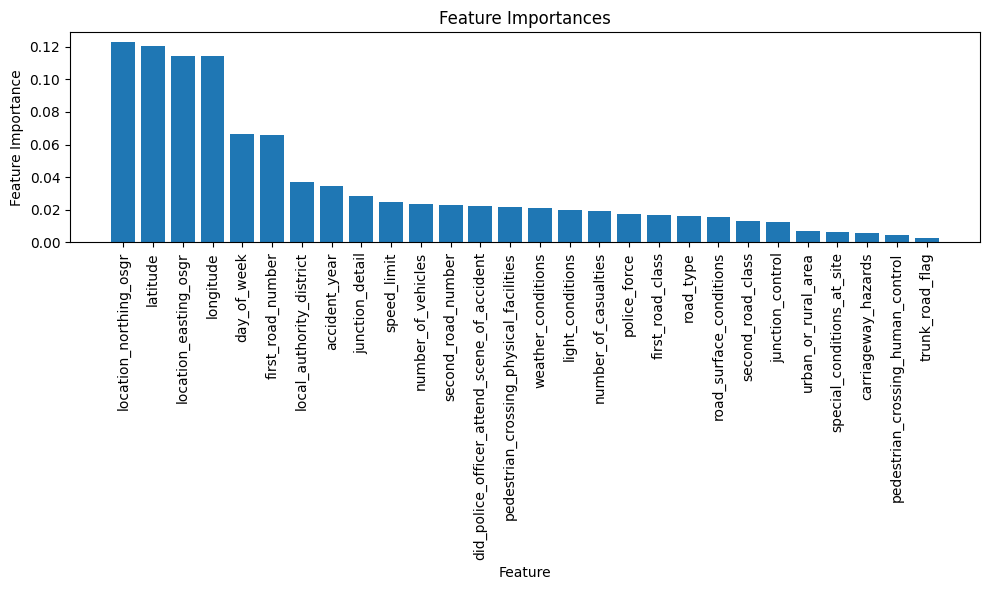

In [ ]:
# Copy the DataFrame into different reference
accident_severity_data =final_df.copy()

# Iterate through each column of the DataFarme with data type object and drop it
for feature in accident_severity_data.dtypes[accident_severity_data.dtypes == 'object'].index :
    accident_severity_data.drop(columns = feature, inplace = True)

# select all the other variable except target variable 'accident_severity'
X = accident_severity_data.drop(columns=['accident_severity'])
# select only target variable
y = accident_severity_data['accident_severity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances into a graph
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
accident_severity_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538325 entries, 0 to 538460
Data columns (total 29 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                538325 non-null  int64  
 1   location_easting_osgr                        538325 non-null  float64
 2   location_northing_osgr                       538325 non-null  float64
 3   longitude                                    538325 non-null  float64
 4   latitude                                     538325 non-null  float64
 5   police_force                                 538325 non-null  int64  
 6   accident_severity                            538325 non-null  int64  
 7   number_of_vehicles                           538325 non-null  int64  
 8   number_of_casualties                         538325 non-null  int64  
 9   day_of_week                                  538325 non-null  in

In [ ]:
# After getting feature ranks in a dictionary or DataFrame
feature_ranks = {
                'latitude':0.12133598111593623,
  'location_northing_osgr':0.12128995733171131,
  'location_easting_osgr':0.11489469308900258,
  'longitude':0.11408108360221374,
  'day_of_week':0.06702836551623113,
  'first_road_number':0.06650933750884097,
  'accident_year':0.037781821272423945,
  'local_authority_district': 0.03517937939017763,
  'junction_detail': 0.029247817642437206,
  'speed_limit': 0.024693086196270614,
  'number_of_vehicles': 0.024372850148788816,
  'second_road_number':0.024238741161551395,
  'light_conditions':0.02257875440783453,
  'did_police_officer_attend_scene_of_accident':0.022064172963805747,
  'pedestrian_crossing_physical_facilities':0.021561360291462696,
  'weather_conditions':0.020454269897313488,
  'number_of_casualties':0.0190217387730733,
  'first_road_class':0.0167278568748726,
  'police_force':0.015672565063029765,
  'road_type':0.015636695254973413,
  'road_surface_conditions':0.014513242948597167,
  'second_road_class':0.013352930670023785,
  'junction_control':0.012173312203412178,
  'urban_or_rural_area':0.0067627876615702675,
  'special_conditions_at_site':0.006400223837927098,
  'carriageway_hazards':0.0056970216579536204,
  'pedestrian_crossing_human_control':0.0039657303768553245,
  'trunk_road_flag':0.002764223141709361}

# Set a threshold for feature selection
threshold = 0.013

# Select features above the threshold
selected_features = [feature for feature, rank in feature_ranks.items() if rank >= threshold]

# Create a subset of data with selected features
subset_data = accident_severity_data[selected_features + ['accident_severity']]

# Verify the selected features
print("Selected Features:", selected_features)

Selected Features: ['latitude', 'location_northing_osgr', 'location_easting_osgr', 'longitude', 'day_of_week', 'first_road_number', 'accident_year', 'local_authority_district', 'junction_detail', 'speed_limit', 'number_of_vehicles', 'second_road_number', 'light_conditions', 'did_police_officer_attend_scene_of_accident', 'pedestrian_crossing_physical_facilities', 'weather_conditions', 'number_of_casualties', 'first_road_class', 'police_force', 'road_type', 'road_surface_conditions', 'second_road_class']


In [ ]:
# create reference of the DataFrame
selected = pd.DataFrame(final_df)

# drop columns with least rank
selected = selected.drop(['junction_control','urban_or_rural_area','special_conditions_at_site','carriageway_hazards','pedestrian_crossing_human_control',
                         'trunk_road_flag'], axis=1)
print(selected.head())

    accident_index  accident_year accident_reference  location_easting_osgr  \
0  2018010000000.0           2018           10080971               529150.0   
1  2018010000000.0           2018           10080973               542020.0   
2  2018010000000.0           2018           10080974               531720.0   
3  2018010000000.0           2018           10080981               541450.0   
4  2018010000000.0           2018           10080982               543580.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                182270.0  -0.139737  51.524587             1   
1                184290.0   0.046471  51.539651             1   
2                182910.0  -0.102474  51.529746             1   
3                183220.0   0.037828  51.530179             1   
4                176500.0   0.065781  51.469258             1   

   accident_severity  number_of_vehicles  ...  speed_limit junction_detail  \
0                  3                   2  ...           

In [ ]:
# Drop all the columns which does not contribute any value

In [ ]:
selected.drop(columns=['longitude', 'latitude'],
        axis=1, inplace=True)

In [ ]:
cat_cols


Index(['accident_index', 'accident_reference', 'date', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'lsoa_of_accident_location'],
      dtype='object')

Accident_index, accident_reference,  is just a number and does not add any value to the accident data so drop that column

In [ ]:
len(selected['accident_index'].unique())
selected.drop('accident_index',axis=1,inplace=True)
len(selected['accident_reference'].unique())
selected.drop('accident_reference',axis=1,inplace=True)

In [ ]:
len(selected['local_authority_ons_district'].unique())
selected.drop('local_authority_ons_district',axis=1,inplace=True)

In [ ]:
len(selected['local_authority_highway'].unique())
selected.drop('local_authority_highway',axis=1,inplace=True)

In [ ]:
len(selected['lsoa_of_accident_location'].unique())
selected.drop('lsoa_of_accident_location',axis=1,inplace=True)

optimising date and time fields

In [ ]:
#identifies column with object datatype
cat_cols=[feature for feature in selected.columns if selected[feature].dtype=='O']
print(cat_cols)

['date', 'time']


In [ ]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538325 entries, 0 to 538460
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                538325 non-null  int64  
 1   location_easting_osgr                        538325 non-null  float64
 2   location_northing_osgr                       538325 non-null  float64
 3   police_force                                 538325 non-null  int64  
 4   accident_severity                            538325 non-null  int64  
 5   number_of_vehicles                           538325 non-null  int64  
 6   number_of_casualties                         538325 non-null  int64  
 7   date                                         538325 non-null  object 
 8   day_of_week                                  538325 non-null  int64  
 9   time                                         538325 non-null  ob

Drop columns which does not add any value

In [ ]:
selected.drop('accident_year',axis=1,inplace=True)


In [ ]:
# convert date field into datetime data type and extract day month and year as separate columns

selected['date'] = pd.to_datetime(selected['date'], format='%d-%m-%Y')
selected["day"] = selected['date'].dt.day
selected["month"] = selected['date'].dt.month
selected["year"] = selected['date'].dt.year

In [ ]:
selected.drop("date",axis=1,inplace=True)
selected.drop("time",axis=1,inplace=True)

In [ ]:
selected.drop("location_easting_osgr",axis=1,inplace=True)
selected.drop("location_northing_osgr",axis=1,inplace=True)

In [ ]:
selected.drop("local_authority_district",axis=1,inplace=True)
selected.drop("first_road_class",axis=1,inplace=True)
selected.drop("first_road_number",axis=1,inplace=True)
selected.drop("second_road_class",axis=1,inplace=True)
selected.drop("second_road_number",axis=1,inplace=True)


In [ ]:
selected.drop("junction_detail",axis=1,inplace=True)
selected.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,did_police_officer_attend_scene_of_accident,day,month,year
0,1,3,2,2,2,3,30,0,4,1,1,1,1,1,2018
1,1,3,1,1,2,6,30,0,4,1,1,1,1,1,2018
2,1,3,2,1,2,6,20,5,4,1,1,1,1,1,2018
3,1,2,2,1,2,3,30,5,4,2,2,1,1,1,2018
4,1,2,2,2,2,6,30,0,4,1,2,1,1,1,2018


view final features after performing feature selection

In [ ]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538325 entries, 0 to 538460
Data columns (total 15 columns):
 #   Column                                       Non-Null Count   Dtype
---  ------                                       --------------   -----
 0   police_force                                 538325 non-null  int64
 1   accident_severity                            538325 non-null  int64
 2   number_of_vehicles                           538325 non-null  int64
 3   number_of_casualties                         538325 non-null  int64
 4   day_of_week                                  538325 non-null  int64
 5   road_type                                    538325 non-null  int64
 6   speed_limit                                  538325 non-null  int64
 7   pedestrian_crossing_physical_facilities      538325 non-null  int64
 8   light_conditions                             538325 non-null  int64
 9   weather_conditions                           538325 non-null  int64
 10  road_surface_

In [ ]:

#separate target variable and independent variables
features = [feature for feature in selected.columns if feature!='accident_severity']

# x stores all independent variables y stores target variable
# inorder to save computational time we can even use iloc function used to take instance of rows
x = selected[features]
y = selected['accident_severity']

# standardizing independent variables using standardScalar
x = StandardScaler().fit_transform(x)

In [ ]:
#RandomOverSampler to oversample the minority class in the target variable y.
#The fit_resample method is called to perform the oversampling
#it returns the resampled feature matrix x and the corresponding resampled target vector y
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)

In [ ]:
# x with all the independent variables y with target variable
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# In order to avoid data leakage we apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
# Create Instance of ExtraTreeClassifier
clf = ExtraTreesClassifier()
# Fit the model
clf.fit(x_train_resampled, y_train_resampled)

ExtraTreesClassifier()

In [ ]:
# Predict Lables on test data
preds=clf.predict(x_test)

In [ ]:
# Evaluate model accuaracy
score=accuracy_score(y_test,preds)
extratree = pd.DataFrame({'Accuracy Score': [score]})
#extratree.to_csv('extratree.csv', index=False)
print(extratree)


   Accuracy Score
0        0.952293


[[84461     0     0]
 [  139 80732  3334]
 [  242  8244 75832]]


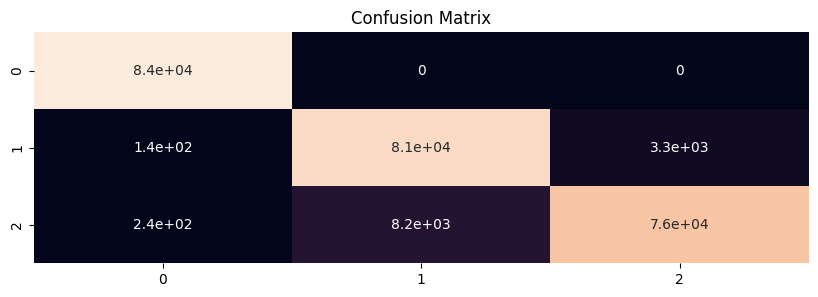

In [ ]:
fig = plt.figure(figsize=(10,3))
conmat = confusion_matrix(y_test, preds)
sns.heatmap(conmat, annot=True, cbar=False)
print(conmat)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Function used from scikit-learn to generate classification report to evaluate performance
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     84461
           2       0.91      0.96      0.93     84205
           3       0.96      0.90      0.93     84318

    accuracy                           0.95    252984
   macro avg       0.95      0.95      0.95    252984
weighted avg       0.95      0.95      0.95    252984



In [ ]:

# Create a RandomForestClassifier instance
clf = RandomForestClassifier()

# Fit the model to the training data
clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
# Predict label for test data
preds=clf.predict(x_test)

In [ ]:
# Evaluate accuracy of the model
randomforest=accuracy_score(y_test,preds)
randomforest = pd.DataFrame({'Accuracy Score': [randomforest]})
#randomforest.to_csv('randomforest.csv', index=False)
print(randomforest)

   Accuracy Score
0        0.934751


In [ ]:
# Function used from scikit-learn to generate classification report to evaluate performance
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     84461
           2       0.87      0.95      0.91     84205
           3       0.95      0.85      0.90     84318

    accuracy                           0.93    252984
   macro avg       0.94      0.93      0.93    252984
weighted avg       0.94      0.93      0.93    252984



In [ ]:
# Initialise k value in KNN
k = 3
# Create instance of KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(x_train_resampled, y_train_resampled)

# Predict the label for test data
preds = knn.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, preds)

knn_score = pd.DataFrame({'Accuracy Score': [accuracy]})
#knn_score.to_csv('knn.csv', index=False)

print("Accuracy:", knn_score)

Accuracy:    Accuracy Score
0        0.837883


In [ ]:
# Function used from scikit-learn to generate classification report to evaluate performance

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98     84461
           2       0.72      0.89      0.79     84205
           3       0.86      0.63      0.72     84318

    accuracy                           0.84    252984
   macro avg       0.85      0.84      0.83    252984
weighted avg       0.85      0.84      0.83    252984



In [52]:
# Trail code for prediction
input_data = (1,1,1,1,2,30,5,5,1,2,1,1,1,2018)
input_data_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_numpy_array.reshape(1,-1)
prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction == 1):
    print("Fatal Accident")
elif (prediction == 2):
    print("Serious Accident")
elif (prediction == 3):
    print("Slight Accident")




[3]
Slight Accident


In [ ]:


# Save the trained model to a file
filename = 'trail.pkl'
pickle.dump(clf, open(filename, 'wb'))